In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df2015 = pd.read_csv('finishers-boston-marathon-2015-2016-2017/marathon_results_2015.csv')
df2016 = pd.read_csv('finishers-boston-marathon-2015-2016-2017/marathon_results_2016.csv')
df2017 = pd.read_csv('finishers-boston-marathon-2015-2016-2017/marathon_results_2017.csv')

In [3]:
# Summary statistics
# Oldest by Year
# Figure 1

print(df2015['Age'].max(), df2016['Age'].max(), df2017['Age'].max())

82 83 84


In [4]:
# Summary statistics
# 2017 Top Overall Man and Woman
# Figure 2

df2017[df2017['Gender'] == 1]

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
20,20,F3,"Kiplagat, Edna",37,F,Uasin Gishu,NaN,KEN,NaN,NaN,...,1:25:51,1:42:40,1:58:41,2:14:43,0:05:25,-,2:21:52,21,1,1


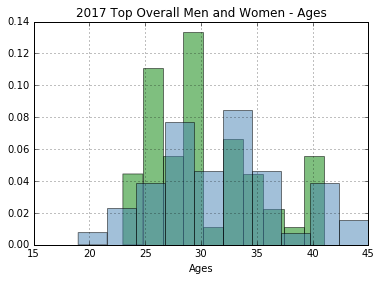

In [5]:
# Preliminary visualizations
# 2017 Top Overall Men and Women - Ages
# Figure 3

plt.hist(df2017['Age'][df2017['Gender'] <= 50][df2017['M/F'] == 'F'], normed=True, color='g', bins=10, alpha=.5)
plt.hist(df2017['Age'][df2017['Gender'] <= 50][df2017['M/F'] == 'M'], normed=True, color='steelblue', bins=10, alpha=.5)
plt.title('2017 Top Overall Men and Women - Ages')
plt.xlabel('Ages')
plt.grid(True)

plt.show()

In [33]:
# Looking at Top Country Participation

Country_counts = df2017['Country'].value_counts()
Country_counts.iloc[0:10]

USA    20945
CAN     1870
GBR      425
MEX      285
CHN      242
GER      226
BRA      205
AUS      191
JPN      170
ITA      165
Name: Country, dtype: int64

In [34]:
# Throwing in Kenya for fun...and removing USA...

Country_counts.loc['KEN']

8

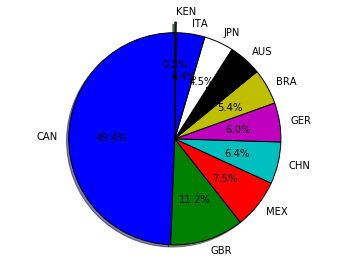

In [36]:
# Looking at Top Country Participation
# Figure 4

labels = 'CAN', 'GBR', 'MEX', 'CHN', 'GER', 'BRA', 'AUS', 'JPN', 'ITA', 'KEN'
sizes = [1870, 425, 285, 242, 226, 205, 191, 170, 165, 8]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [ ]:
# Converting time-duration columns to secs

def get_sec(time_str):
    h,m,s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [ ]:
# Converting time-duration columns to secs

df2015['5K_sec'] = [get_sec(i) for i in df2015['15K']]
df2015['10K_sec'] = [get_sec(i) for i in df2015['10K']]
df2015['15K_sec'] = [get_sec(i) for i in df2015['15K']]
df2015['20K_sec'] = [get_sec(i) for i in df2015['20K']]
df2015['Half_sec'] = [get_sec(i) for i in df2015['Half']]
df2015['25K_sec'] = [get_sec(i) for i in df2015['25K']]
df2015['30K_sec'] = [get_sec(i) for i in df2015['30K']]
df2015['35K_sec'] = [get_sec(i) for i in df2015['35K']]
df2015['40K_sec'] = [get_sec(i) for i in df2015['40K']]
df2015['Pace_sec'] = [get_sec(i) for i in df2015['Pace']]
df2015['Official_Time_sec'] = [get_sec(i) for i in df2015['Official Time']]

df2016['5K_sec'] = [get_sec(i) for i in df2016['15K']]
df2016['10K_sec'] = [get_sec(i) for i in df2016['10K']]
df2016['15K_sec'] = [get_sec(i) for i in df2016['15K']]
df2016['20K_sec'] = [get_sec(i) for i in df2016['20K']]
df2016['Half_sec'] = [get_sec(i) for i in df2016['Half']]
df2016['25K_sec'] = [get_sec(i) for i in df2016['25K']]
df2016['30K_sec'] = [get_sec(i) for i in df2016['30K']]
df2016['35K_sec'] = [get_sec(i) for i in df2016['35K']]
df2016['40K_sec'] = [get_sec(i) for i in df2016['40K']]
df2016['Pace_sec'] = [get_sec(i) for i in df2016['Pace']]
df2016['Official_Time_sec'] = [get_sec(i) for i in df2016['Official Time']]

df2017['5K_sec'] = [get_sec(i) for i in df2017['15K']]
df2017['10K_sec'] = [get_sec(i) for i in df2017['10K']]
df2017['15K_sec'] = [get_sec(i) for i in df2017['15K']]
df2017['20K_sec'] = [get_sec(i) for i in df2017['20K']]
df2017['Half_sec'] = [get_sec(i) for i in df2017['Half']]
df2017['25K_sec'] = [get_sec(i) for i in df2017['25K']]
df2017['30K_sec'] = [get_sec(i) for i in df2017['30K']]
df2017['35K_sec'] = [get_sec(i) for i in df2017['35K']]
df2017['40K_sec'] = [get_sec(i) for i in df2017['40K']]
df2017['Pace_sec'] = [get_sec(i) for i in df2017['Pace']]
df2017['Official_Time_sec'] = [get_sec(i) for i in df2017['Official Time']]

In [ ]:
# 1
# Comparisson BAR CHART
# Visualizing the best individual runners' various paces as part of whole race
# Thinking of descending/slowing (I assume) pace over bars left to right

# comparing multiple runners (bars per pace section) by Age? and then Gender?

# --
# This work is not that, just an old idea/framework

xticks_years = ['2015', '2016', '2017']
ages_by_year = [df2015['Age'].max(), df2016['Age'].max(), df2017['Age'].max()]

x_pos = [i for i, _ in enumerate(xticks_years)]

plt.bar(x_pos, ages_by_year, align='center', color='steelblue', edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Ages")
plt.title("Ages by Year")
plt.xticks(x_pos, xticks_years)

plt.show()

In [ ]:
# 2
# Bubble plotting by country performance (official time and pace)
# Bubble size by country count (aka participation)
# 2017

# x = Official Time
# y = Pace
# s = Country Count (w/ labels)

Countries = df2017['Country'].unique()
Countries.sort()

the_best = pd.DataFrame(index=Countries)
the_best['Country_Count'] = list(df2017['Country'].value_counts())
the_best['Official_Time_secs'] = df2017.groupby('Country')['Official_Time_secs'].mean()
the_best['Pace_secs'] = df2017.groupby('Country')['Pace_secs'].mean()

a = the_best['Official_Time']
b = the_best['Pace']
c = the_best['Country_Count']

plt.scatter(a, b, s=c*10, alpha=0.5)
plt.show()

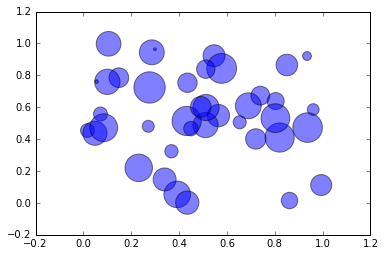

In [37]:
# Scatter example

x = np.random.rand(40)
y = np.random.rand(40)
z = np.random.rand(40)
 
# use the scatter function
plt.scatter(x, y, s=z*1000, alpha=0.5)
plt.show()

In [ ]:
# 3
# Stacked BAR CHART (Genders w/ stacked average paces) 
# Bubble plot here
# Still need to convert durations to secs

x1 = df2015.ix[df1['Overall'].idxmin()]['Official Time_secs']
x2 = df2016.ix[df1['Overall'].idxmin()]['Official Time_secs']
x3 = df2017.ix[df1['Overall'].idxmin()]['Official Time_secs']

y1 = df2015.ix[df1['Overall'].idxmin()]['Pace_secs']
y2 = df2016.ix[df1['Overall'].idxmin()]['Pace_secs']
y3 = df2017.ix[df1['Overall'].idxmin()]['Pace_secs']

names = [x1 = df2015.ix[df1['Overall'].idxmin()]['Name'],
        x1 = df2016.ix[df1['Overall'].idxmin()]['Name'],
        x1 = df2017.ix[df1['Overall'].idxmin()]['Name']]

the_best = pd.DataFrame(index=names)
the_best['Official_Time'] = [x1, x2, x3]
the_best['Pace'] = [y1, y2, y3]

a = the_best['Official_Time']
b = the_best['Pace']
c = the_best['Age']
 
plt.scatter(a, b, s=c*1000, alpha=0.5)
plt.show()


In [ ]:
# Bayesian predictive scenario of a runner in 2019?
# Likelihood of winning given a pace and...a country? or gender?